In [2]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.48 ms


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sac import calculate_sac

from gtda.homology import CubicalPersistence
import gtda.diagrams as dg
from gtda.plotting import plot_diagram, plot_heatmap

import collections

from visualize import plot_ratemaps

time: 1.76 s


In [4]:
activations = np.load('../data/activations512.npy')
activations40 = np.load('../data/activations512r40.npy')
activations100 = np.load('../data/activations512r100.npy')

alist=[activations,activations40,activations100]

time: 151 ms


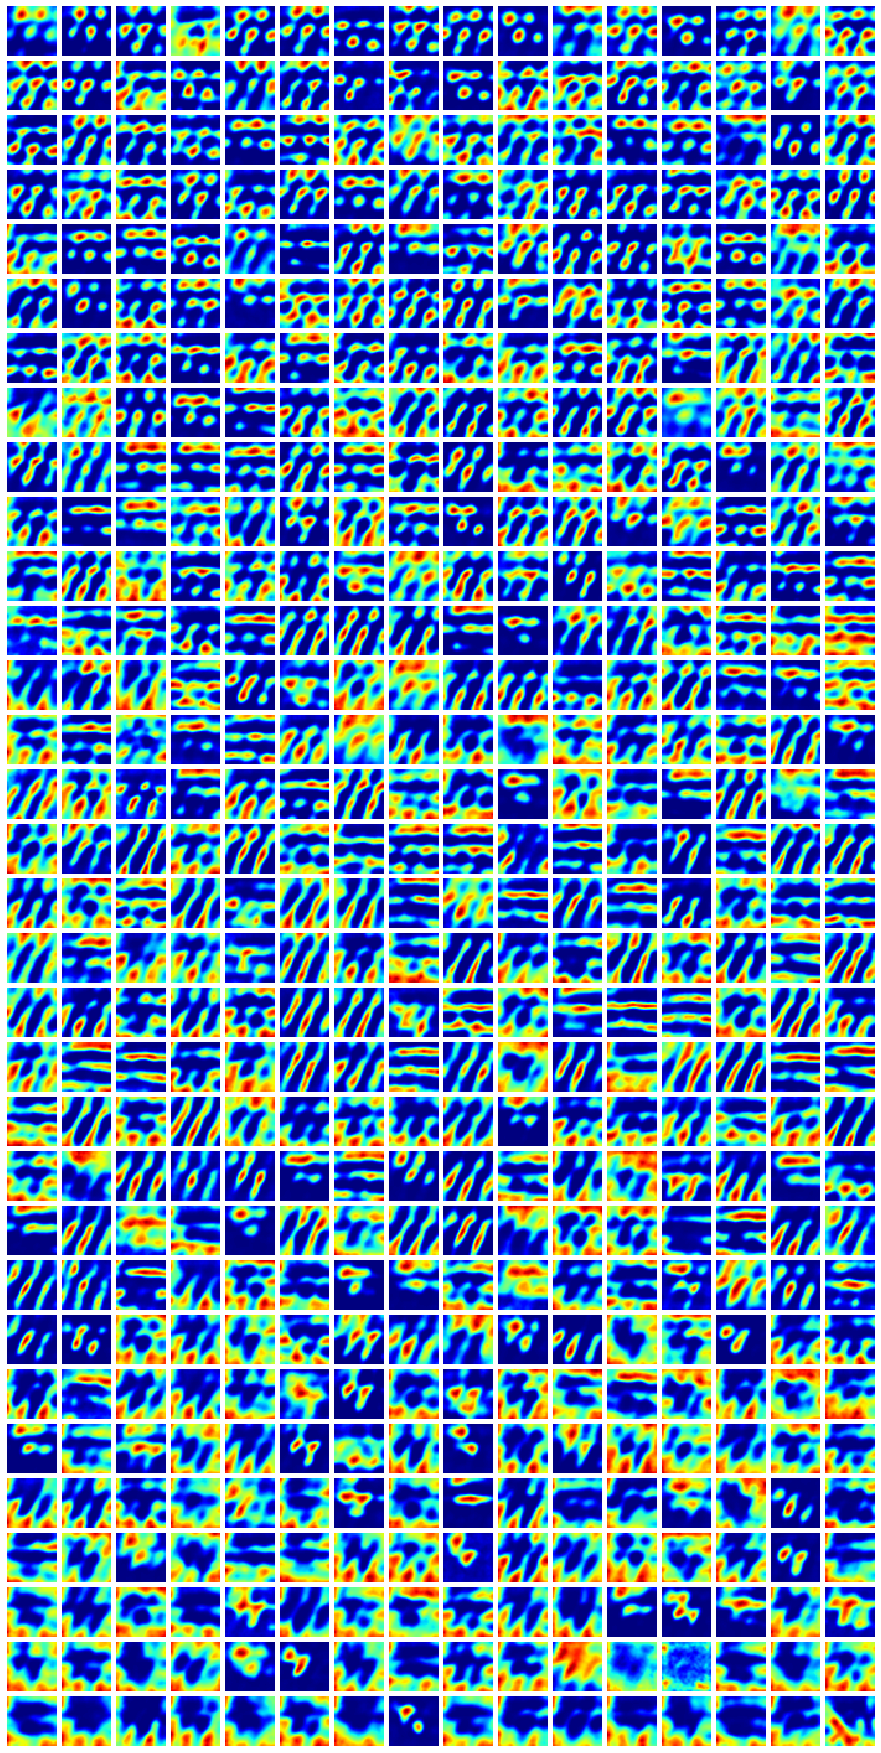

time: 1.19 s


In [5]:
n_plot = len(activations40)
plt.figure(figsize=(16,4*n_plot//8**2))
rm_fig = plot_ratemaps(activations40, n_plot, smooth=True)
plt.imshow(rm_fig)
plt.axis('off');

In [6]:
sacslist = []
sacslist40 = []
sacslist100 = []
slist = [sacslist,sacslist40,sacslist100]

time: 3.2 ms


In [7]:
for i in range(len(activations)):
    sacslist.append(calculate_sac(activations[i]))

time: 4.75 s


In [9]:
'''
for i in range(len(activations40)):
    sacslist40.append(calculate_sac(activations40[i]))
    
for i in range(len(activations100)):
    sacslist100.append(calculate_sac(activations100[i]))
'''

'\nfor i in range(len(activations40)):\n    sacslist40.append(calculate_sac(activations40[i]))\n    \nfor i in range(len(activations100)):\n    sacslist100.append(calculate_sac(activations100[i]))\n'

time: 11.4 ms


In [8]:
sacs = np.stack(sacslist)
#sacs40 = np.stack(sacslist40)
#sacs100 = np.stack(sacslist100)

sacs40 = np.load('../data/sacs40.npy')
sacs100 = np.load('../data/sacs100.npy')

time: 536 ms


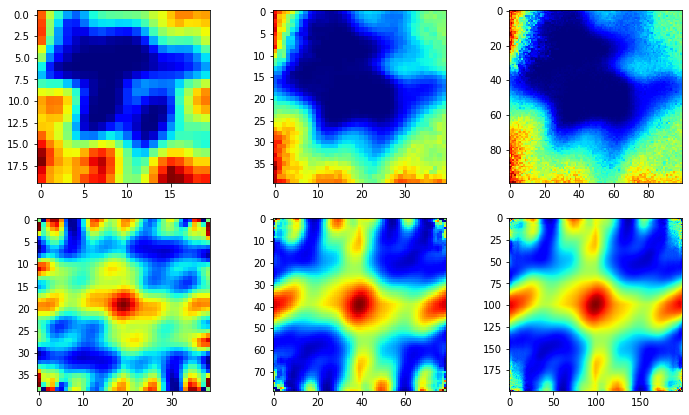

time: 714 ms


In [10]:
idx = 500
plt.figure(figsize=(12,7))
plt.subplot(231)
plt.imshow(activations[idx],cmap='jet')
plt.subplot(232)
plt.imshow(activations40[idx],cmap='jet')
plt.subplot(233)
plt.imshow(activations100[idx],cmap='jet')
plt.subplot(234)
plt.imshow(sacs[idx],cmap='jet')
plt.subplot(235)
plt.imshow(sacs40[idx],cmap='jet')
plt.subplot(236)
plt.imshow(sacs100[idx],cmap='jet')

In [11]:
masked_sacs = sacs[:,9:-9,9:-9]
masked_sacs40 = sacs40[:,19:-19,19:-19]
masked_sacs100 = sacs100[:,49:-49,49:-49]

time: 4.91 ms


In [12]:
masked_sacs.shape, masked_sacs40.shape, masked_sacs100.shape
#sacs.shape, sacs40.shape, sacs100.shape

((512, 21, 21), (512, 41, 41), (512, 101, 101))

time: 7.3 ms


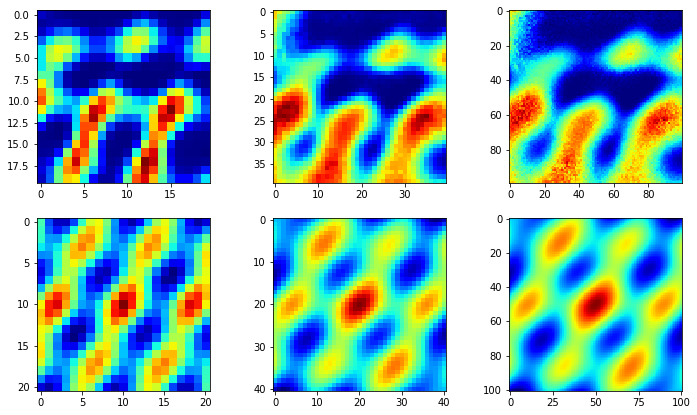

time: 643 ms


In [19]:
idx = 100
plt.figure(figsize=(12,7))
plt.subplot(231)
plt.imshow(activations[idx],cmap='jet')
plt.subplot(232)
plt.imshow(activations40[idx],cmap='jet')
plt.subplot(233)
plt.imshow(activations100[idx],cmap='jet')
plt.subplot(234)
plt.imshow(masked_sacs[idx],cmap='jet')
plt.subplot(235)
plt.imshow(masked_sacs40[idx],cmap='jet')
plt.subplot(236)
plt.imshow(masked_sacs100[idx],cmap='jet')

In [20]:
persist = CubicalPersistence()
dgms = persist.fit_transform(-masked_sacs)
dgms40 = persist.fit_transform(-masked_sacs40)
dgms100 = persist.fit_transform(-masked_sacs100)

time: 12.4 s


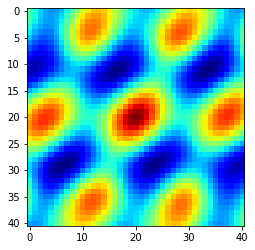

time: 140 ms


In [21]:
plt.imshow(masked_sacs40[5],cmap='jet')

In [22]:
cubpers = CubicalPersistence()
dgms40 = cubpers.fit_transform(-masked_sacs40[4:6])

time: 18.4 ms


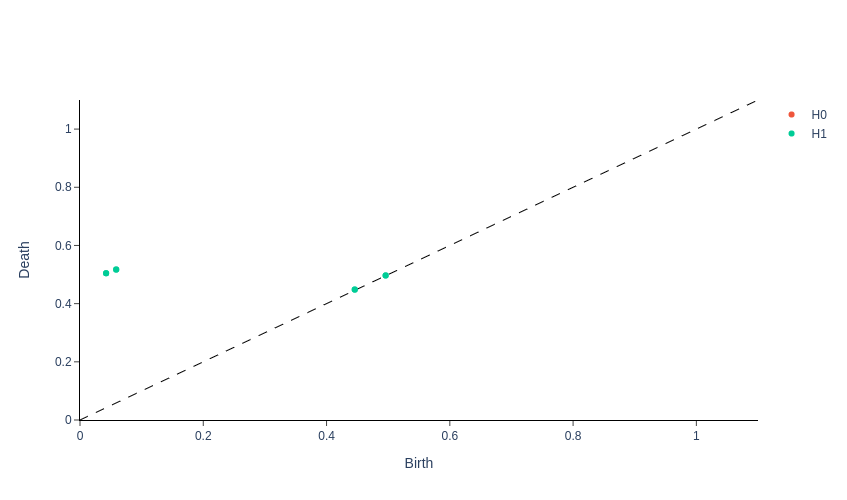

time: 127 ms


In [23]:
plot_diagram(dgms40[1])

In [24]:
dgms40 = cubpers.fit_transform(-masked_sacs40)

time: 1.91 s


In [25]:
pairdis = dg.PairwiseDistance('bottleneck', n_jobs=-1)

time: 3.64 ms


In [26]:
distances = pairdis.fit_transform(dgms40)

time: 1min 29s


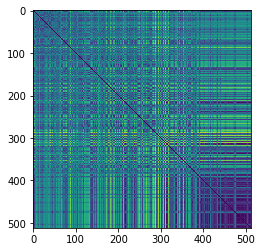

time: 200 ms


In [27]:
plt.imshow(distances)

In [28]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete', distance_threshold=None)
model3 = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete', distance_threshold=None)
model4 = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete', distance_threshold=None)
model2.fit(distances)
model3.fit(distances)
model4.fit(distances)

AgglomerativeClustering(affinity='precomputed', linkage='complete',
                        n_clusters=4)

time: 133 ms


In [29]:
import collections
labels = model4.labels_
dic = collections.Counter(labels)
for keys in dic.keys():
    print(keys,':', dic[keys])

3 : 267
1 : 85
0 : 153
2 : 7
time: 9.79 ms


In [30]:
c = activations40[np.where(labels==2)]

time: 4.01 ms


In [31]:
def skt_transform(dgm):
    dgmskt = []
    for i in list(set(dgm[:,2])):
        dgmskt.append((dgm[np.where(dgm[:,2]==i),:2]).reshape(-1,2))
        return dgmskt

time: 3.27 ms
